# Ví dụ 1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Read csv data file, change to your location
df = pd.read_csv("/content/drive/MyDrive/ML/Week5/data/iris.csv")

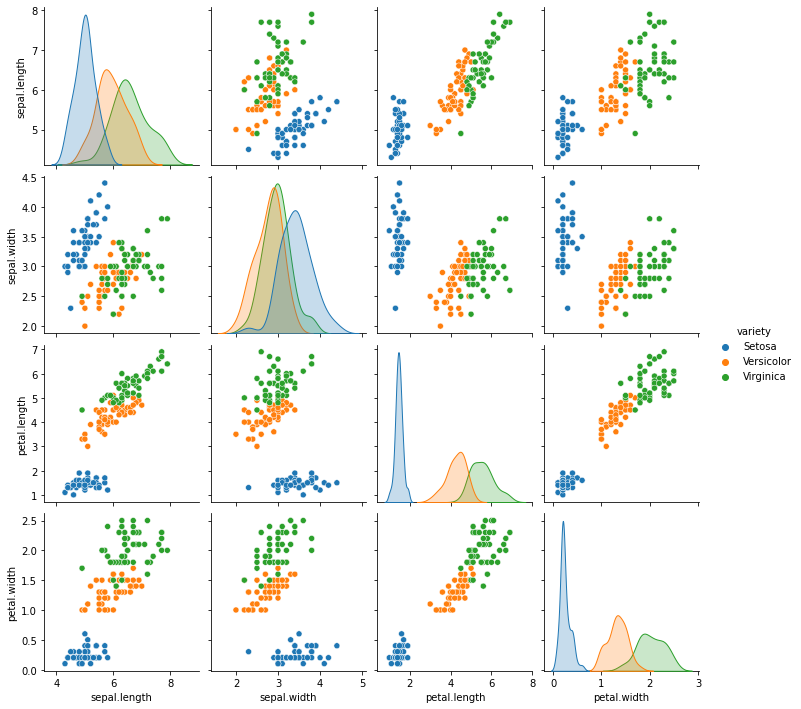

In [ ]:
df
df.describe()
sns.pairplot(df, hue = 'variety')

Text(0.5, 1.0, 'Correlation matrix')

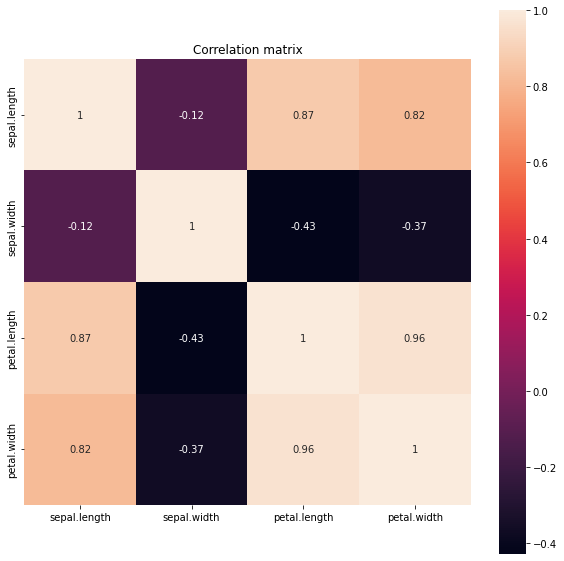

In [ ]:
# We're seperating the species column
species = df["variety"].tolist()
X = df.drop("variety", 1)
# Standardize the data
X = (X - X.mean()) / X.std(ddof=0)
# Calculating the correlation matrix of the data
X_corr = (1 / 150) * X.T.dot(X)
# Plotting the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(X_corr, vmax=1, square=True,annot=True)
plt.title('Correlation matrix')

In [ ]:
# method1
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
eig_values, eig_vectors
# method2
np.linalg.eig(X_corr)

(array([2.91849782, 0.91403047, 0.14675688, 0.02071484]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

Text(0.5, 0, 'Dimensions')

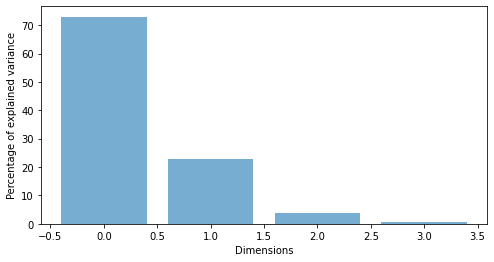

In [ ]:
# plotting the variance explained by each PC
explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(4), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

In [ ]:
# calculating our new axis
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])

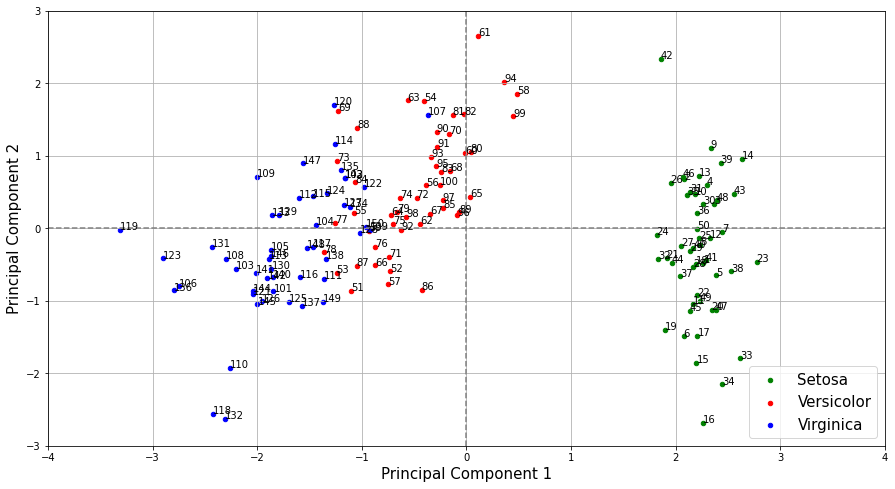

In [ ]:
# plotting in 2D
def plot_scatter(pc1, pc2):
  fig, ax = plt.subplots(figsize=(15, 8))
  species_unique = list(set(species))
  species_colors = ["r","b","g"]
  for i, spec in enumerate(species):
    plt.scatter(pc1[i], pc2[i], label = spec, s = 20, c=species_colors[species_unique.index(spec)])
    ax.annotate(str(i+1), (pc1[i],pc2[i]))
  from collections import OrderedDict
  handles, labels = plt.gca().get_legend_handles_labels()
  by_label = OrderedDict(zip(labels, handles))
  plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.axhline(y=0, color="grey", linestyle="--")
  ax.axvline(x=0, color="grey", linestyle="--")
  plt.grid()
  plt.axis([-4, 4, -3, 3])
  plt.show()
plot_scatter(pc1, pc2)

### Sử dụng thư viện sklearn

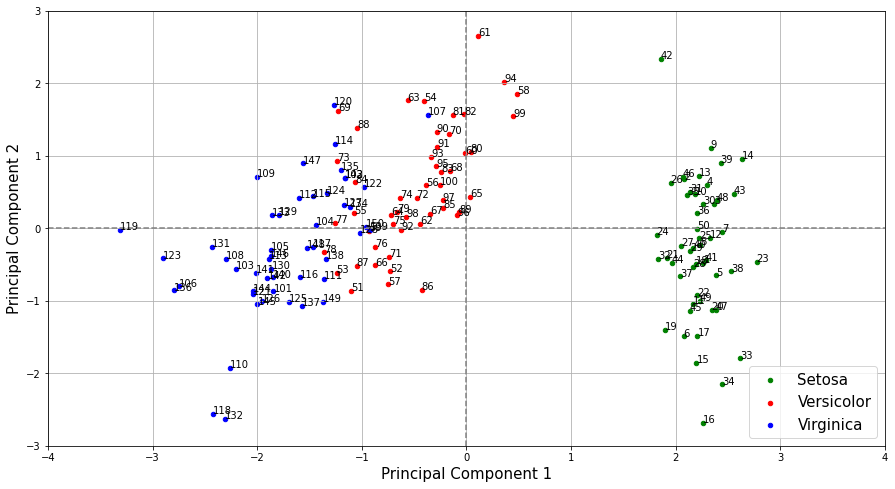

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Read csv data file, change to your location
df = pd.read_csv("/content/drive/MyDrive/ML/Week5/data/iris.csv")
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df.drop("variety", 1)
X = StandardScaler().fit_transform(X)
pca = PCA()
result = pca.fit_transform(X)
# Remember what we said about the sign of eigen vectors that might change ?
pc1 = - result[:,0]
pc2 = - result[:,1]
plot_scatter(pc1, pc2)

# Bài tập

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv("/content/drive/MyDrive/ML/Week5/data/iris.csv")
y = df['variety'].tolist()
df = df.drop(['variety'],axis=1)

# Map target values to mumeric values
diction = {'Setosa': '0', 'Versicolor': '1', 'Virginica': '2'}

for word, replacement in diction.items():
    y = list(map(lambda x: x.replace(word, replacement), y))
y = [int(item) for item in y]

# Perform PCA
pac = PCA(n_components=2)
X = pac.fit_transform(df)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Train logistic regression model
lgre = LogisticRegression(multi_class='multinomial',solver='sag', max_iter=5000)
lgre.fit(X_train, y_train)
y_hat = lgre.predict(X_test)


print(f'Accuracy = {accuracy_score(y_test, y_hat )}')


Accuracy = 0.9666666666666667


# Ví dụ 2


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df= pd.read_csv("/content/drive/MyDrive/ML/Week5/data/pd_speech_features.csv")
df.head()
df['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

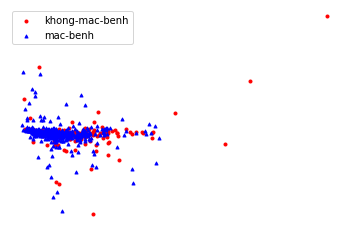

In [ ]:
y = df['class'].to_numpy()
df = df.drop(['class', 'id'], axis =1)
pca_draw = PCA(n_components=2)
result = pd.DataFrame(pca_draw.fit_transform(df))

plt.axis("off")
plt.scatter(result[y==0][0], result[y==0][1], s=9, label='khong-mac-benh', c='red')
plt.scatter(result[y==1][0], result[y==1][1], s=9, label='mac-benh',c='blue', marker="^")
plt.legend()
plt.show()


In [ ]:
pca = PCA(n_components=200)
X = pca.fit_transform(df)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=256)

lgre = LogisticRegression(multi_class='multinomial',solver='sag', max_iter=5000)
lgre.fit(X_train, y_train)
y_hat = lgre.predict(X_test)


print(f'Accuracy = {accuracy_score(y_test, y_hat )}')

Accuracy = 0.671875


# Ví dụ 3

In [ ]:
import os
import numpy as np
# set names to the paths because they're too long
data_path = '/content/drive/MyDrive/ML/Week5/data'
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

In [ ]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
  """
  This shuffle param is active when .gz is downloaded at:
  - 'http://yann.lecun.com/exdb/mnist/'
  - This function return random num_images in 60000 or 10000
  """
  # read data
  import gzip # to decompress gz (zip) file
  # open file training to read training data
  f_images = gzip.open(images_path,'r')

  # skip 16 first bytes because these are not data, only header infor
  f_images.read(16)

  # general: read num_images data samples if this parameter is set;
  # if not, read all (60000 training or 10000 test)
  real_num = num_images if not shuffle else (60000 if _is else 10000)
  
  # read all data to buf_images (28x28xreal_num)
  buf_images = f_images.read(image_size * image_size * real_num)

  # images
  images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
  images = images.reshape(real_num, image_size, image_size,)

  # Read labels
  f_labels = gzip.open(labels_path,'r')
  f_labels.read(8)
  labels = np.zeros((real_num)).astype(np.int64)

  # rearrange to correspond the images and labels
  for i in range(0, real_num):
    buf_labels = f_labels.read(1)
    labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)
  # shuffle to get random images data
  if shuffle is True:
    rand_id = np.random.randint(real_num, size=num_images)

    images = images[rand_id, :]
    labels = labels[rand_id,]

  # change images data to type of vector 28x28 dimentional
  images = images.reshape(num_images, image_size * image_size)
  return images, labels

In [ ]:
images, labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)
print(images.shape, labels.shape)


(5000, 784) (5000,)


# Split data and fit model

In [ ]:
# Case field
import time
# giảm xuống 100 chiều
pca = PCA(n_components=100)
X_100 = pca.fit_transform(images)

# split data
X_100_train, X_100_test, y_100_train, y_100_test = train_test_split(X_100,labels, test_size=0.3)


# Tạo mô hình Logistic Regression
start_100_field = time.time()
lgre = LogisticRegression(multi_class='multinomial',solver='sag', max_iter=5000)
lgre.fit(X_100_train, y_100_train)
y_100_hat = lgre.predict(X_100_test)

end_100_field = time.time()
# Tính thời gian huấn luyện mô hình
time_100_field = end_100_field - start_100_field
print(time_100_field)


20.53903102874756


In [ ]:
# Case 28X28 filed
X_train, X_test, y_train, y_test = train_test_split(images,labels, test_size=0.3)


# fit model 
start_784_field = time.time()

lgre = LogisticRegression(multi_class='multinomial',solver='sag', max_iter=5000)
lgre.fit(X_train, y_train)
y_hat = lgre.predict(X_test)


end_784_field = time.time()

time_784_field = end_784_field - start_784_field
print(time_784_field)


In [ ]:
print(f'Accuracy with 100 field  = {accuracy_score(y_100_test, y_100_hat )}, time = {time_100_field}')
print(f'Accuracy  with 784 field  = {accuracy_score(y_test, y_hat )}, time = {time_784_field}')

Accuracy with 100 field  = 0.8506666666666667, time = 20.53903102874756
Accuracy  with 784 field  = 0.671875, time = 299.0139067173004
